In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    11
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dropna(ignore_index=True,inplace=True)

In [7]:
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


/home/arnel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


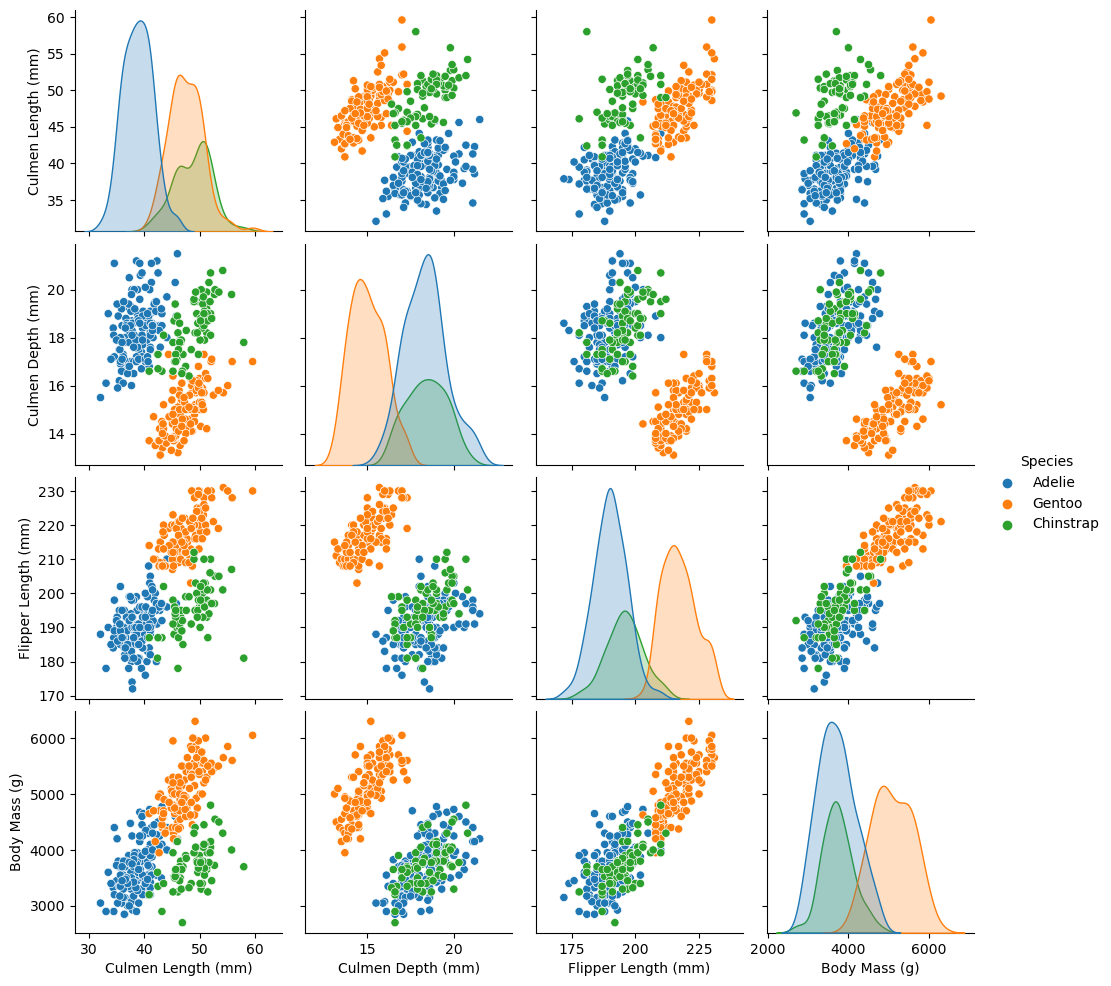

In [8]:
sns.pairplot(df,hue='Species')

In [10]:
df['Sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

remplacement des valeurs sexes male et female par 0 et 1

In [11]:
df['Sex']=df['Sex'].replace(to_replace=df.Sex.unique(),value=[0,1])

In [12]:
df['Sex'].value_counts()

Sex
0    168
1    165
Name: count, dtype: int64

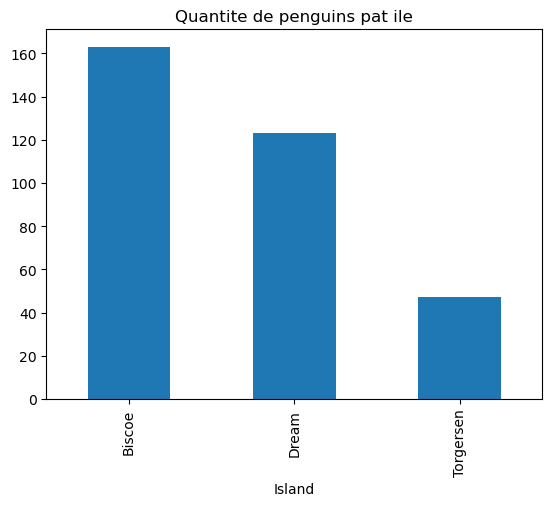

In [13]:
df['Island'].value_counts().plot.bar()
plt.title("Quantite de penguins pat ile");

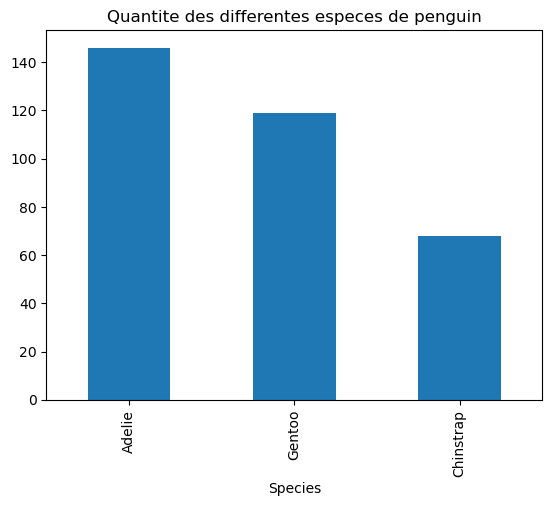

In [12]:
df['Species'].value_counts().plot.bar();
plt.title("Quantite des differentes especes de penguin");

In [7]:
sns.heatamp(data=df.select_dtypes(include=np.number).corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,-0.228626,0.653096,0.589451
Culmen Depth (mm),-0.228626,1.000000,-0.577792,-0.472016
Flipper Length (mm),0.653096,-0.577792,1.000000,0.872979
Body Mass (g),0.589451,-0.472016,0.872979,1.000000


In [18]:
pd.get_dummies(df['Island'],dtype='int',drop_first=True).head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [21]:
df=pd.concat([df,pd.get_dummies(df['Island'],dtype='int',drop_first=True)],axis=1)

In [23]:
df.drop("Island",axis=1,inplace=True)

In [24]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,1,0,1
2,Adelie,40.3,18.0,195.0,3250.0,1,0,1
3,Adelie,36.7,19.3,193.0,3450.0,1,0,1
4,Adelie,39.3,20.6,190.0,3650.0,0,0,1


In [25]:
X=df.iloc[:,1:]
y=df['Species']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [28]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [29]:
model.score(x_train,y_train)

1.0

In [30]:
y_pred=model.predict(x_test)

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

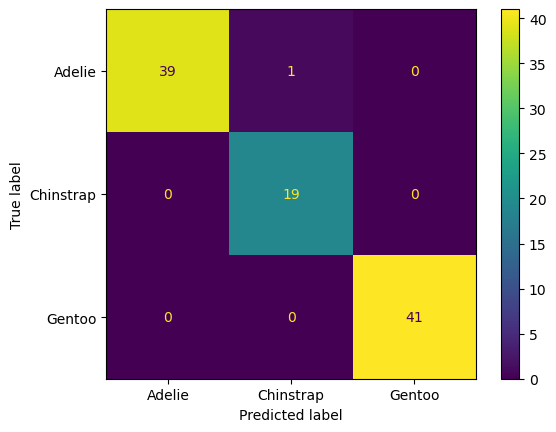

In [33]:
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test);

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        40
   Chinstrap       0.95      1.00      0.97        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [38]:
model.feature_importances_

array([0.33071131, 0.12233734, 0.22834969, 0.15174633, 0.0091926 ,
       0.13926411, 0.01839862])

In [41]:
dc=pd.DataFrame(data=model.feature_importances_,index=X.columns,columns=['features_importances'])
dc

,features_importances
Culmen Length (mm),0.330711
Culmen Depth (mm),0.122337
Flipper Length (mm),0.228350
Body Mass (g),0.151746
Sex,0.009193
Dream,0.139264
Torgersen,0.018399


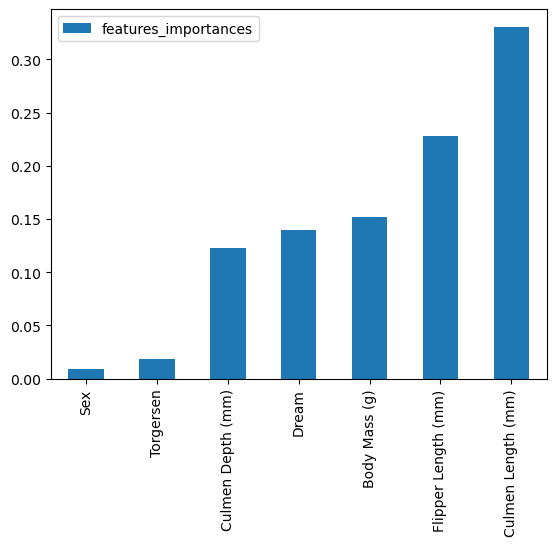

In [42]:
dc.sort_values(by='features_importances').plot.bar();

In [44]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}